In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [51]:
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

In [53]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [54]:
df=pd.DataFrame(iris.data ,columns=iris.feature_names)

In [55]:
df.drop(["sepal length (cm)","sepal width (cm)"],axis=1, inplace=True)

In [56]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


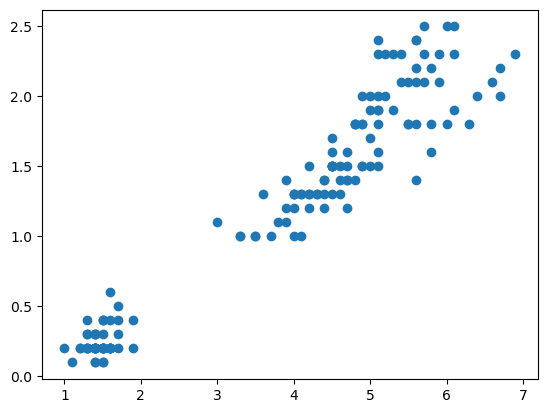

In [57]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df[["petal length (cm)","petal width (cm)"]]= scaler.fit_transform(df[["petal length (cm)","petal width (cm)"]])

In [59]:
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [60]:
from sklearn.cluster import KMeans

In [61]:
model=KMeans(n_clusters=3)

In [62]:
model.fit(df[["petal length (cm)","petal width (cm)"]])

KMeans(n_clusters=3)

In [63]:
df['cluster']= model.predict(df[["petal length (cm)","petal width (cm)"]])

In [64]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [65]:
df0=df[df["cluster"]==0]
df1=df[df["cluster"]==1]
df2=df[df["cluster"]==2]

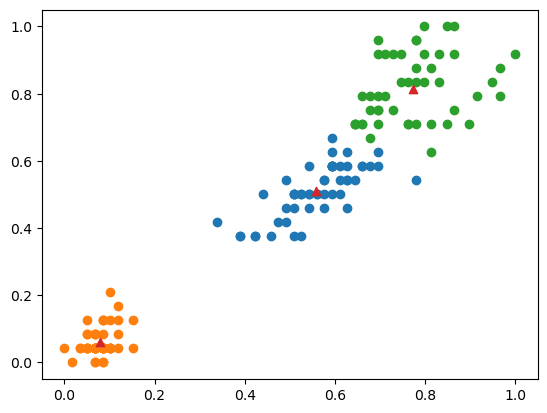

In [66]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"])
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1] ,marker="^")

In [67]:
sse=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(model.inertia_)
    

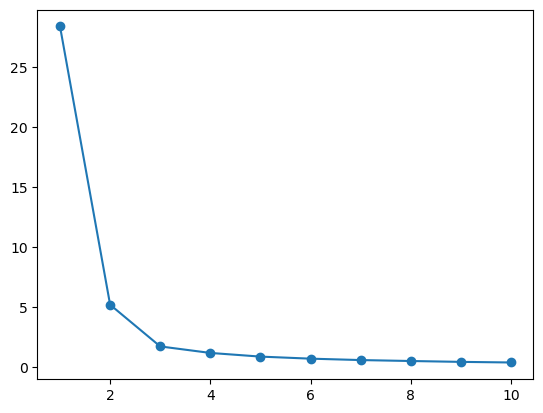

In [68]:
plt.plot(range(1,11), sse)
plt.scatter(range(1,11), sse)